---
# **Laboratory 9**
---





#1
Find the best and worst cases for the Gale-Shapley and Irving ( [An Efficient Algorithm for the “Stable Roommates” Problem](http://www.dcs.gla.ac.uk/~pat/jchoco/roommates/papers/Comp_sdarticle.pdf "An Efficient Algorithm for the “Stable Roommates” Problem")) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.
* Gale–Shapley algorithm simply explained – [towardsdatascience](https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2 "Gale–Shapley algorithm simply explained")
* Stable Marriage Problem – [geeksforgeeks](https://www.geeksforgeeks.org/stable-marriage-problem/ "Stable MArriage Problem")
* Stable matching, as a game – [towardsdatascience.com](https://towardsdatascience.com/stable-matching-as-a-game-a68c279d70b "Stable matching, as a game")



### **Gale-Shapeley's algorithm pseudocode (male proposes)**
```
function stableMatching {
    Initialize all m ∈ M and w ∈ W to free
    while ∃ free man m who still has a woman w to propose to {
       w = first woman on m’s list to whom m has not yet proposed
       if w is free
         (m, w) become engaged
       else some pair (m', w) already exists
         if w prefers m to m'
            m' becomes free
           (m, w) become engaged 
         else
           (m', w) remain engaged
    }
}
```

**Note:** Each preference list is ordered from left to right in increasing order of the rank, i.e., the leftmost person is the most preferable and the rightmost person is the least preferable.



**Best case for Gale-Shapeley**

This happens when a man has a woman as a first option to propose, and that woman also prefers the man over the others. The algorithm in this case just runs $n$ times, one for each man.

**Worst case for Gale-Shapeley**

We know that this algorithm is optimal for men but not for women. Then it is natural to think the worst case happens when for all men are assigned a partner with low priority while women are paired with their first option[1]. (https://www.mdpi.com/1999-4893/6/2/371/htm#B2-algorithms-06-00371) 



In [1]:

def stableMatching(lw,lm):
  n=len(lw)
  men=[i for i in range(n)]
  disp_women=[True for _ in range(n)] #a list who contains the values of dispossable women
  preference_list_men=lm[:] #copy the preference lists of men
  preference_list_women=lw[:] #copy the preference lists of men
  pairs={}
  count=0
  while len(men)>0:
    count +=1
    m=men.pop(0)
    if len(preference_list_men[m])>0:
      w=preference_list_men[m].pop(0)
      if disp_women[w]:
        pairs[w]=m
        disp_women[w]=False  
      else:
        m_w=pairs[w]
        preference_order_m_w=preference_list_women[w].index(m_w)
        preference_order_m=preference_list_women[w].index(m)
        if preference_order_m<preference_order_m_w:
          men.append(m_w)
          pairs[w]=m
        else:
          men.append(m)
  return [pairs,count]

In [2]:
def bestCaseBuilder(n):
  aux=[i for i in range(n)]
  lw=[]
  for i in range(n):
    lw.append(aux[i:]+aux[:i])
  lm=lw[:]
  return [lw,lm]

def worstCaseBuilder(n):
  aux=[i for i in range(n)]
  lw=[]
  for i in range(n):
    lw.append(aux[i:]+aux[:i])
  lw.append(lw.pop(0))
  lm=[]
  for i in range(n):
    lm.append(aux[i:n-1]+aux[:i]+aux[n-1:])
  return [lw,lm]

enes=[4,40]
max_iter={}
min_iter={}
for n in enes:
  best_case=bestCaseBuilder(n)
  worst_case=worstCaseBuilder(n)
  print("For n=",n,"\n--- Best case ---")
  print("Women preference lists:",best_case[0])
  print("Men preference lists:",best_case[1])
  result=stableMatching(best_case[0],best_case[1])
  print("Match:",result[0]) #
  print("# of iterations",result[1]) #Number of iterations
  min_iter[n]=result[1] #We use this for point 2
  print("--- Worst case ---")
  print("Women preference lists:",worst_case[0])
  print("Men preference lists:",worst_case[1])
  result=stableMatching(worst_case[0],worst_case[1])
  print("Match:",result[0]) #
  print("# of iterations",result[1],"\n-------------") #Number of iterations
  max_iter[n]=result[1] #We use this for point 2
  

For n= 4 
--- Best case ---
Women preference lists: [[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
Men preference lists: [[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
Match: {0: 0, 1: 1, 2: 2, 3: 3}
# of iterations 4
--- Worst case ---
Women preference lists: [[1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2], [0, 1, 2, 3]]
Men preference lists: [[0, 1, 2, 3], [1, 2, 0, 3], [2, 0, 1, 3], [0, 1, 2, 3]]
Match: {0: 1, 1: 2, 2: 3, 3: 0}
# of iterations 13 
-------------
For n= 40 
--- Best case ---
Women preference lists: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 1], [3, 4, 

**Irving's algorithm for Roommate problem**

_**Best cases:**_
The algorithm is  divided i two phases. 
* One case is when the algorithm found that there is no perfect matching.
* This happens when all people can be assigned with her first option, because only is needed the first phase.

In [3]:
def stableRoommates(preferences_list):
  #Phase 1
  hold={}
  proposals= list(range(len(preferences_list)))
  rejected_flag = False
  while len(proposals)>0: #while there are proposals and there is no one rejected by all others (the break part)
    #print(preferences_list)
    #print(hold)
    proposal=proposals.pop(0) #choose the first proposal in the proposals list
    if len(preferences_list[proposal])>0:
      proposed=preferences_list[proposal][0] #choose the first person to be proposed in the preferences list of the proposal person
    else:
      rejected_flag=True
      break
    if not proposed in hold: #if the proposed has not a proposal, then
      hold[proposed]=proposal #add the proposal to the hold dictionary
    else:
      other_proposal=hold[proposed]
      if preferences_list[proposed].index(other_proposal)< preferences_list[proposed].index(proposal):
        #reject the proposal
        preferences_list[proposed].remove(proposal)
        preferences_list[proposal].remove(proposed)
        proposals.append(proposal)
      else:
        #reject the other proposal
        preferences_list[proposed].remove(other_proposal)
        preferences_list[other_proposal].remove(proposed)
        proposals.append(other_proposal)
        hold[proposed]=proposal
  if rejected_flag:
    return False
  #remove less valuable proposals
  proposals= list(range(len(preferences_list)))
  while len(proposals)>0:
    proposal=proposals.pop(0)
    inv_hold = {v: k for k, v in hold.items()} #invert the hold dictionary to search who hold the proposal
    proposed= inv_hold[proposal] #find the proposed
    aux_list=preferences_list[proposed][:] #create an aux list of the proposed person's preferences
    indice=aux_list.index(proposal) #check the index (priority) of the proposal in the proposed person's preferences
    preferences_list[proposed]=aux_list[:indice+1] #remove the people with lower priority (rejected) than the proposal person
    for rejected in aux_list[indice+1:]: #we will remove the proposed person from the rejected people's preference list
      preferences_list[rejected].remove(proposed)
  print(preferences_list)
  #Phase 2
  cycles=list(range(len(preferences_list)))
  while len(cycles)>0:
    p=[]
    q=[]
    flag=False
    p_1=cycles.pop(0)
    while not p_1  in p:
      p.append(p_1)
      if len(preferences_list[p[-1]])>=2:
        q.append(preferences_list[p[-1]][1]) #second element of p list
        p_1=preferences_list[q[-1]][-1] #last element of q list
      else:
        flag=True
        break
    if flag: #Skip the removal of cycles, because p list has only one element
      continue
    indice=p.index(p_1)
    p.append(p_1)
    for i in range(indice+1,len(p)):
      preferences_list[q[i-1]].remove(p[i])
      preferences_list[p[i]].remove(q[i-1])
  parejas={}
  for i in range(len(preferences_list)):
    if len(preferences_list[i])==1:
      parejas[i]=preferences_list[i][0]
    else:
      return False
  return parejas
  
pref=[[3,5,1,4,2], [5,2,4,0,3], [3,4,0,5,1], [1,5,4,0,2], [3,1,2,5,0], [4,0,3,1,2]] #First example of the article
#pref=[[1,5,3,2,4], [2,4,0,5,3],[0,5,1,4,3],[4,1,2,5,0],[5,0,2,3,1],[3,1,4,0,2]] #This case fails because cycles cannot be reduced
#pref=[[1,2,3,4,5],[0,2,3,4,5],[3,0,1,4,5],[2,0,1,4,5],[5,0,1,2,3],[4,0,1,2,3]] #Best case
print(stableRoommates(pref))

[[5], [2, 4, 3], [4, 1], [1, 4], [3, 1, 2], [0]]
{0: 5, 1: 2, 2: 1, 3: 4, 4: 3, 5: 0}


#2
Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.


For n= 4
# minimum of iterations: 4
# maximum of iterations: 11
# average of iterations: 6.609


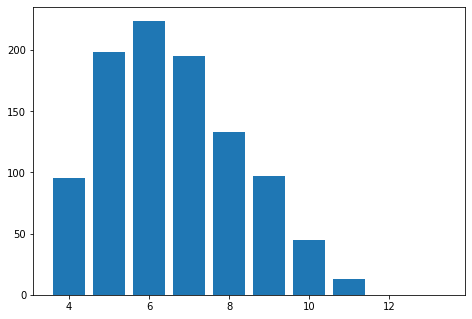

For n= 40
# minimum of iterations: 72
# maximum of iterations: 353
# average of iterations: 155.981


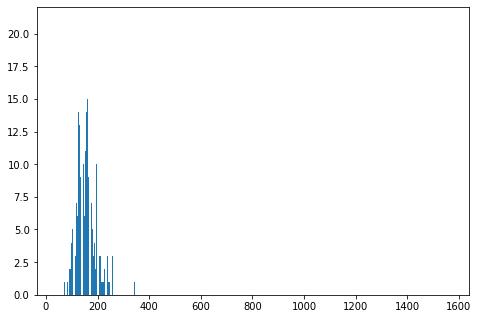

In [4]:
import random as rnd
import matplotlib.pyplot as plt

def randomPreferenceListsGenerator(n):
  lists_women = []
  for _ in range(n):
    aux=[i for i in range(n)]
    rnd.shuffle(aux)
    lists_women.append(aux[:])
  lists_men =[]
  for _ in range(n):
    aux=[i for i in range(n)]
    rnd.shuffle(aux)
    lists_men.append(aux[:])
  return [lists_women,lists_men]


k=1000 #times will run the algorithm

enes=[4,40] #size of the preference lists
for n in enes:
  print("For n=",n)
  iterations=[0 for _ in range(min_iter[n],max_iter[n]+1)]
  max_iterations=min_iter[n]
  min_iterations=max_iter[n]
  acumm_iter=0
  for _ in range(k):
    preferencias=randomPreferenceListsGenerator(n)
    resultado=stableMatching(preferencias[0],preferencias[1])
    iterations[resultado[1]-min_iter[n]] +=1
    max_iterations=max(max_iterations,resultado[1])
    min_iterations=min(min_iterations,resultado[1])
    acumm_iter += resultado[1]
  average_iter= acumm_iter/k
  print("# minimum of iterations:",min_iterations)
  print("# maximum of iterations:",max_iterations)
  print("# average of iterations:",average_iter)
  fig = plt.figure()
  ax1 = fig.add_axes([0,0,1,1])
  ax1.bar(range(min_iter[n],max_iter[n]+1),iterations)
  plt.show()




